In [1]:
!pip install xgboost --root-user-action=ignore


[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


# <p style="padding:10px;background-color:#A020F0;margin:0;color:white;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Import all you need</p>

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import numpy as np
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [3]:
df = pd.read_csv('/kaggle/input/data-disease/Training.csv')
df.head(5)

itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0        1          1                     1                    0          0   
1        0          1                     1                    0          0   
2        1          0                     1                    0          0   
3        1          1                     0                    0          0   
4        1          1                     1                    0          0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  ...  scurring  \
0       0           0             0        0                 0  ...         0   
1       0           0             0        0                 0  ...         0   
2       0           0             0        0                 0  ...         0   
3       0           0             0        0                 0  ...         0   
4       0           0             0        0                 0  ...         0   

   skin_peeling  silver_like_dusting  small_dents_in_nails  \
0             0                    0                     0   
1             0                    0                     0   
2             0                    0                     0   
3             0                    0                     0   
4             0                    0                     0   

   inflammatory_nails  blister  red_sore_around_nose  yellow_crust_ooze  \
0                   0        0                     0                  0   
1                   0        0                     0                  0   
2                   0        0                     0                  0   
3                   0        0                     0                  0   
4                   0        0                     0                  0   

          prognosis  Unnamed: 133  
0  Fungal infection           NaN  
1  Fungal infection           NaN  
2  Fungal infection           NaN  
3  Fungal infection           NaN  
4  Fungal infection           NaN  

[5 rows x 134 columns]

# <p style="padding:10px;background-color:#A020F0;margin:0;color:white;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">EDA</p>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 134 entries, itching to Unnamed: 133
dtypes: float64(1), int64(132), object(1)
memory usage: 5.0+ MB


In [5]:
df.describe()

itching    skin_rash  nodal_skin_eruptions  continuous_sneezing  \
count  4920.000000  4920.000000           4920.000000          4920.000000   
mean      0.137805     0.159756              0.021951             0.045122   
std       0.344730     0.366417              0.146539             0.207593   
min       0.000000     0.000000              0.000000             0.000000   
25%       0.000000     0.000000              0.000000             0.000000   
50%       0.000000     0.000000              0.000000             0.000000   
75%       0.000000     0.000000              0.000000             0.000000   
max       1.000000     1.000000              1.000000             1.000000   

         shivering       chills   joint_pain  stomach_pain      acidity  \
count  4920.000000  4920.000000  4920.000000   4920.000000  4920.000000   
mean      0.021951     0.162195     0.139024      0.045122     0.045122   
std       0.146539     0.368667     0.346007      0.207593     0.207593   
min       0.000000     0.000000     0.000000      0.000000     0.000000   
25%       0.000000     0.000000     0.000000      0.000000     0.000000   
50%       0.000000     0.000000     0.000000      0.000000     0.000000   
75%       0.000000     0.000000     0.000000      0.000000     0.000000   
max       1.000000     1.000000     1.000000      1.000000     1.000000   

       ulcers_on_tongue  ...   blackheads     scurring  skin_peeling  \
count       4920.000000  ...  4920.000000  4920.000000   4920.000000   
mean           0.021951  ...     0.021951     0.021951      0.023171   
std            0.146539  ...     0.146539     0.146539      0.150461   
min            0.000000  ...     0.000000     0.000000      0.000000   
25%            0.000000  ...     0.000000     0.000000      0.000000   
50%            0.000000  ...     0.000000     0.000000      0.000000   
75%            0.000000  ...     0.000000     0.000000      0.000000   
max            1.000000  ...     1.000000     1.000000      1.000000   

       silver_like_dusting  small_dents_in_nails  inflammatory_nails  \
count          4920.000000           4920.000000         4920.000000   
mean              0.023171              0.023171            0.023171   
std               0.150461              0.150461            0.150461   
min               0.000000              0.000000            0.000000   
25%               0.000000              0.000000            0.000000   
50%               0.000000              0.000000            0.000000   
75%               0.000000              0.000000            0.000000   
max               1.000000              1.000000            1.000000   

           blister  red_sore_around_nose  yellow_crust_ooze  Unnamed: 133  
count  4920.000000           4920.000000        4920.000000           0.0  
mean      0.023171              0.023171           0.023171           NaN  
std       0.150461              0.150461           0.150461           NaN  
min       0.000000              0.000000           0.000000           NaN  
25%       0.000000              0.000000           0.000000           NaN  
50%       0.000000              0.000000           0.000000           NaN  
75%       0.000000              0.000000           0.000000           NaN  
max       1.000000              1.000000           1.000000           NaN  

[8 rows x 133 columns]

In [6]:
df.isnull().sum()

itching                    0
skin_rash                  0
nodal_skin_eruptions       0
continuous_sneezing        0
shivering                  0
                        ... 
blister                    0
red_sore_around_nose       0
yellow_crust_ooze          0
prognosis                  0
Unnamed: 133            4920
Length: 134, dtype: int64

In [7]:
df.select_dtypes(include='object')

prognosis
0                            Fungal infection
1                            Fungal infection
2                            Fungal infection
3                            Fungal infection
4                            Fungal infection
...                                       ...
4915  (vertigo) Paroymsal  Positional Vertigo
4916                                     Acne
4917                  Urinary tract infection
4918                                Psoriasis
4919                                 Impetigo

[4920 rows x 1 columns]

In [8]:
df['prognosis'].unique()

array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo'], dtype=object)

In [9]:
df.drop(columns='Unnamed: 133',inplace=True)
df.dropna(inplace=True)

# <p style="padding:10px;background-color:#A020F0;margin:0;color:white;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Visualization</p>

/tmp/ipykernel_11698/981963742.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")


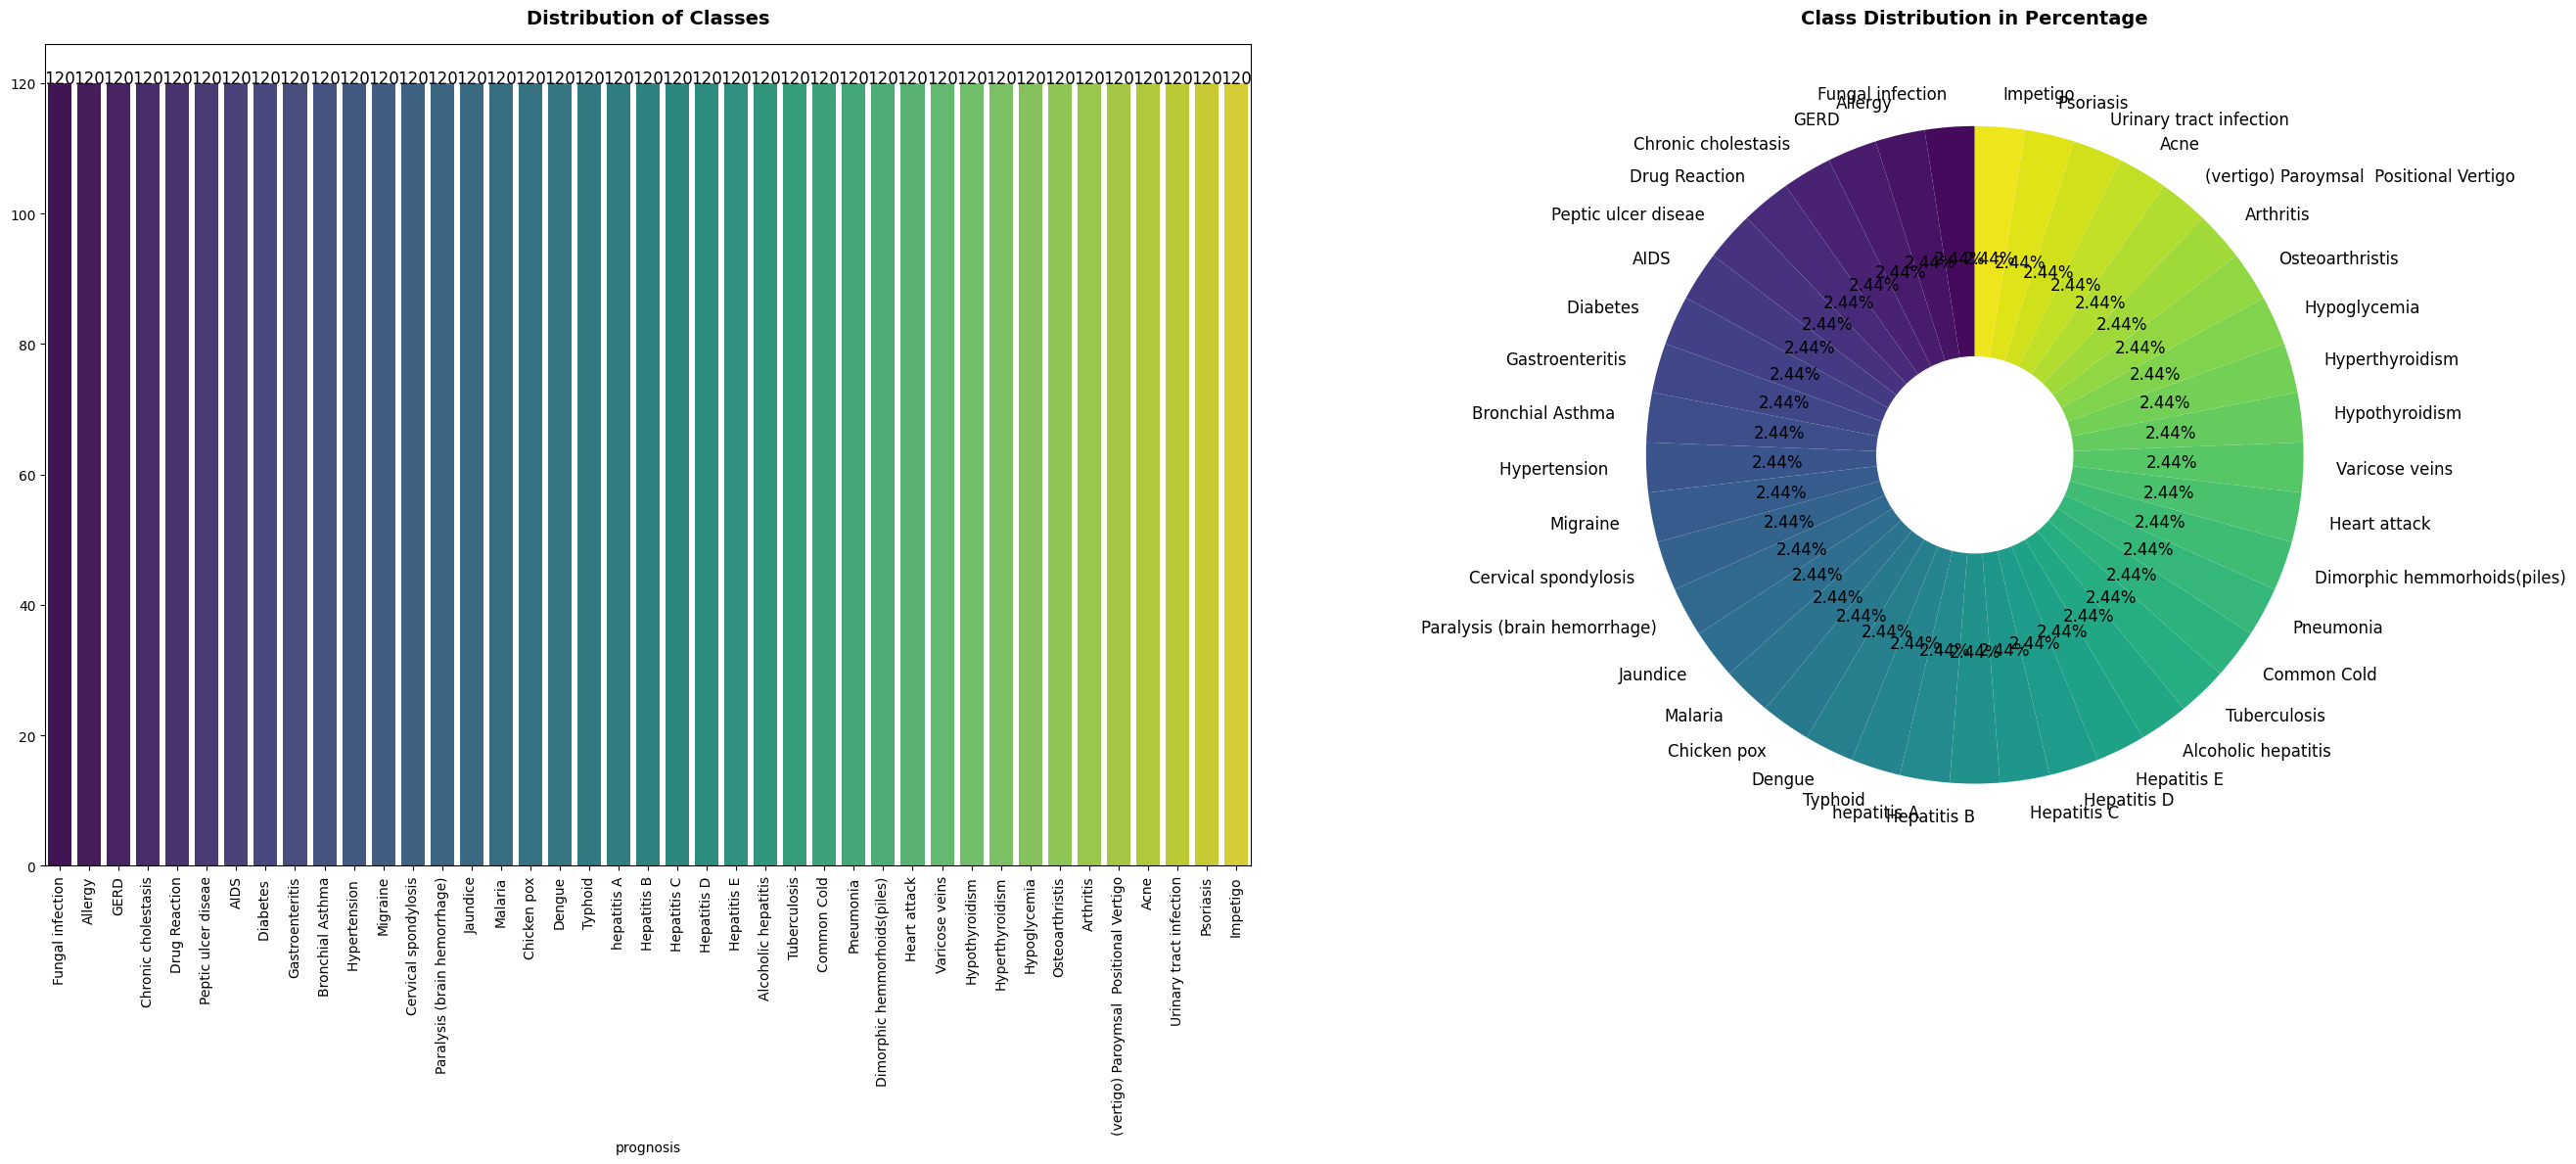

In [10]:
plt.figure(figsize=(28, 12))

plt.subplot(1, 2, 1)
class_counts = df["prognosis"].value_counts()

sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")
plt.title("Distribution of Classes", fontweight="bold", size=14, pad=15)

for index, value in enumerate(class_counts.values):
    plt.text(index, value, str(value), ha="center", fontsize=12)

plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
colors = sns.color_palette("viridis", len(class_counts))
plt.pie(class_counts, labels=class_counts.index, autopct="%.2f%%",
        colors=colors, startangle=90, textprops={"fontsize": 12})

center_circle = plt.Circle((0, 0), 0.3, fc="white")
plt.gca().add_artist(center_circle)
plt.title("Class Distribution in Percentage", fontweight="bold", size=14, pad=15)

plt.tight_layout()
plt.show()


In [12]:
c=df.copy()
encoder=LabelEncoder()
c['prognosis']=encoder.fit_transform(c['prognosis'])

corr = c.corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
with sns.axes_style('white'):
    fig, ax = plt.subplots(figsize=(100,100))
    sns.heatmap(corr,  mask=mask, annot=True, cmap='CMRmap', center=0, linewidths=0.1, square=True,annot_kws={"size": 16})

# <p style="padding:10px;background-color:#A020F0;margin:0;color:white;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Preprocessing </p>

In [11]:
df.drop(columns='fluid_overload',inplace=True)

In [13]:
encoder = LabelEncoder()
df["prognosis"] = encoder.fit_transform(df["prognosis"])

In [14]:
X = df.iloc[:,:-1]
y = df.iloc[:, -1]

# <p style="padding:10px;background-color:#A020F0;margin:0;color:white;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">build best model</p>

In [24]:
def build_best_xgboost(X, y):

    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    # Define parameters grid
    param_grid = {
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.05, 0.1],
        'n_estimators': [100, 200, 300],
        'min_child_weight': [1, 3, 5],
        'gamma': [0, 0.1, 0.2],
        'subsample': [0.8, 0.9, 1.0],
        'colsample_bytree': [0.8, 0.9, 1.0]
    }

    model = xgb.XGBClassifier(
            objective='binary:logistic',
            use_label_encoder=False,
            eval_metric='logloss')


    # Perform grid search
    grid_search = RandomizedSearchCV(
        estimator=model,
        param_distributions=param_grid,
        cv=5,
        scoring='accuracy',
        n_jobs=-1,
        verbose=1
    )
    
    # Fit the model
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    
    # Make predictions
    y_pred = best_model.predict(X_test)
    
    # Evaluate model
    performance = {}
    performance['accuracy'] = accuracy_score(y_test, y_pred)
    performance['precision'] = precision_score(y_test, y_pred, average='weighted')
    performance['recall'] = recall_score(y_test, y_pred, average='weighted')
    performance['f1'] = f1_score(y_test, y_pred, average='weighted')

    # Print results
    print("Best parameters:", grid_search.best_params_)
    print("\nModel Performance:")
    for metric, value in performance.items():
        print(f"{metric}: {value:.4f}")
    
    return best_model, performance


In [25]:
best_model, metrics = build_best_xgboost(X, y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [18:41:57] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [18:41:57] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [18:41:57] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [18:41:57] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [18:41:57] WARNING: /w

Best parameters: {'subsample': 0.9, 'n_estimators': 300, 'min_child_weight': 1, 'max_depth': 7, 'learning_rate': 0.1, 'gamma': 0.2, 'colsample_bytree': 0.8}

Model Performance:
accuracy: 1.0000
precision: 1.0000
recall: 1.0000
f1: 1.0000


# <p style="padding:10px;background-color:#A020F0;margin:0;color:white;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">evaluate best model</p>

In [29]:
test_data = pd.read_csv("/kaggle/input/data-disease/Testing.csv").dropna(axis=1)
test_data.drop(columns=['fluid_overload'],inplace=True)

test_X = test_data.iloc[:, :-1]
test_Y = encoder.transform(test_data.iloc[:, -1])


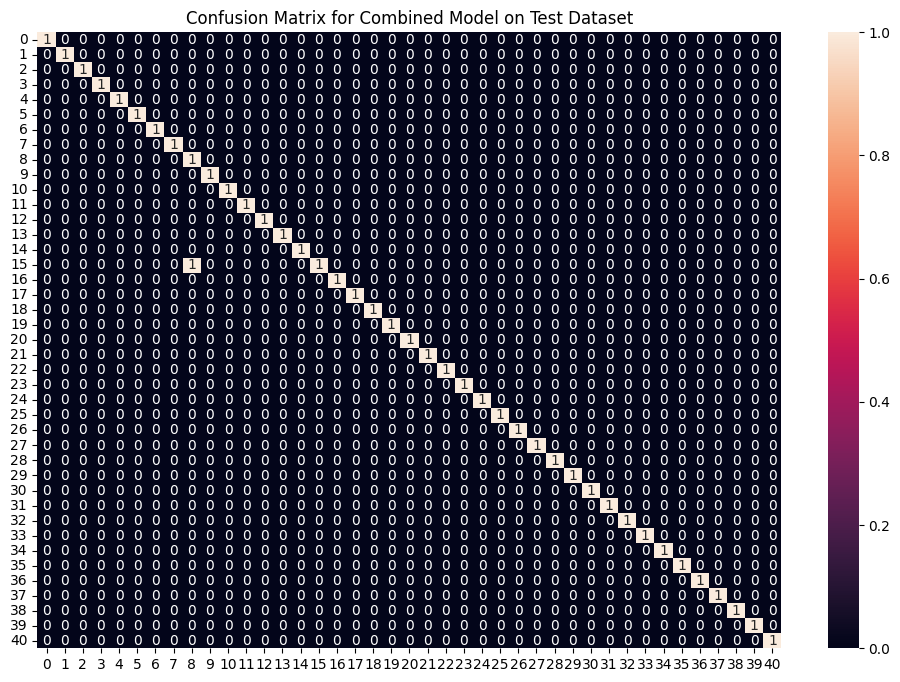

In [34]:
best_model_preds = best_model.predict(test_X)


cf_matrix = confusion_matrix(test_Y, best_model_preds)
plt.figure(figsize=(12,8))

sns.heatmap(cf_matrix, annot = True)
plt.title("Confusion Matrix for Combined Model on Test Dataset")
plt.show()
